# Evaluate Multiple Models

In this notebook, we will evaluate the performance of four pre-trained models on the wildfire dataset. The model with the best performance will then be selected for further experimentation.

The four models are:
- `Resnet50`
- `VGG16`
- `Xception`
- `Inception_v3`

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Create train directory
train_dir = '../dataset/forest_fire/training_and_validation'

In [3]:
# Function to create train and validation data from data generator
def create_datagen(model, preprocessor, dir=train_dir, batch_size=32, img_size=(224, 224)):
    if model=='resnet50':
        datagen = ImageDataGenerator(preprocessing_function=preprocessor,
                           validation_split=0.2)
    elif model=='vgg16':
        datagen = ImageDataGenerator(preprocessing_function=preprocessor,
                               validation_split=0.2)
    elif model=='xception':
        datagen = ImageDataGenerator(preprocessing_function=preprocessor,
                               validation_split=0.2)
    elif model=='inception_v3':
        datagen = ImageDataGenerator(preprocessing_function=preprocessor,
                               validation_split=0.2)
    else:
        pass
    
    train_data = datagen.flow_from_directory(directory=dir,
                                              target_size=img_size,
                                              batch_size=32,
                                              class_mode='binary',
                                              subset='training',
                                              seed=42)

    val_data = datagen.flow_from_directory(directory=dir,
                                              target_size=img_size,
                                              batch_size=32,
                                              class_mode='binary',
                                              subset='validation',
                                              seed=42)
    
    return train_data, val_data

In [4]:
# resnet50
train_ds_resnet, val_ds_resnet = create_datagen(model='resnet50', preprocessor=tf.keras.applications.resnet50.preprocess_input)
# vgg16
train_ds_vgg, val_ds_vgg = create_datagen(model='vgg16', preprocessor=tf.keras.applications.vgg16.preprocess_input)
# xception
train_ds_xception, val_ds_xception = create_datagen(model='xception', preprocessor=tf.keras.applications.xception.preprocess_input)
# inception_v3
train_ds_inception, val_ds_inception = create_datagen(model='inception_v3', preprocessor=tf.keras.applications.inception_v3.preprocess_input)

Found 1467 images belonging to 2 classes.
Found 365 images belonging to 2 classes.
Found 1467 images belonging to 2 classes.
Found 365 images belonging to 2 classes.
Found 1467 images belonging to 2 classes.
Found 365 images belonging to 2 classes.
Found 1467 images belonging to 2 classes.
Found 365 images belonging to 2 classes.


In [5]:
# Function to define model
def define_model(base_model):
    base_model = base_model
    base_model.trainable = False

    inputs = tf.keras.layers.Input(shape=(224, 224, 3))
    x = base_model(inputs)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(loss='binary_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])
    
    return model

In [6]:
# Instantiate models
resnet50_model = define_model(base_model=tf.keras.applications.resnet50.ResNet50(include_top=False))
vgg16_model = define_model(base_model=tf.keras.applications.vgg16.VGG16(include_top=False))
xception_model = define_model(base_model=tf.keras.applications.xception.Xception(include_top=False))
inception_v3_model = define_model(base_model=tf.keras.applications.inception_v3.InceptionV3(include_top=False))

2023-01-18 09:30:02.052548: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-18 09:30:02.149768: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-18 09:30:02.150595: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-18 09:30:02.152273: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

87924736/87910968 [==============================] - 0s 0us/step


In [7]:
# Function to train model
def model_training(model, train_ds, val_ds):
    history = model.fit(train_ds,
                        epochs=10,
                        steps_per_epoch=len(train_ds),
                        validation_data=val_ds,
                        validation_steps=len(val_ds))
    
    return history, model

In [8]:
# Train resnet50
resent_history, resnet_model = model_training(model=resnet50_model,
                                              train_ds=train_ds_resnet,
                                              val_ds=val_ds_resnet)

2023-01-18 09:30:13.910138: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2023-01-18 09:30:17.988125: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


46/46 [==============================] - 21s 249ms/step - loss: 0.1769 - accuracy: 0.9366 - val_loss: 0.0836 - val_accuracy: 0.9726
Epoch 2/10
46/46 [==============================] - 7s 152ms/step - loss: 0.0356 - accuracy: 0.9925 - val_loss: 0.0633 - val_accuracy: 0.9808
Epoch 3/10
46/46 [==============================] - 7s 147ms/step - loss: 0.0236 - accuracy: 0.9945 - val_loss: 0.0559 - val_accuracy: 0.9808
Epoch 4/10
46/46 [==============================] - 7s 143ms/step - loss: 0.0169 - accuracy: 0.9980 - val_loss: 0.0511 - val_accuracy: 0.9836
Epoch 5/10
46/46 [==============================] - 6s 140ms/step - loss: 0.0136 - accuracy: 0.9980 - val_loss: 0.0472 - val_accuracy: 0.9863
Epoch 6/10
46/46 [==============================] - 7s 140ms/step - loss: 0.0106 - accuracy: 0.9980 - val_loss: 0.0479 - val_accuracy: 0.9836
Epoch 7/10
46/46 [==============================] - 7s 149ms/step - loss: 0.0090 - accuracy: 0.9993 - val_loss: 0.0455 - val_accuracy: 0.9836
Epoch 8/10
46/46

In [9]:
# Train vgg16
vgg_history, vgg_model = model_training(model=vgg16_model,
                                        train_ds=train_ds_vgg,
                                        val_ds=val_ds_vgg)

Epoch 1/10
46/46 [==============================] - 14s 241ms/step - loss: 0.2630 - accuracy: 0.8889 - val_loss: 0.1749 - val_accuracy: 0.9425
Epoch 2/10
46/46 [==============================] - 7s 141ms/step - loss: 0.0776 - accuracy: 0.9741 - val_loss: 0.1327 - val_accuracy: 0.9589
Epoch 3/10
46/46 [==============================] - 6s 139ms/step - loss: 0.0515 - accuracy: 0.9816 - val_loss: 0.1166 - val_accuracy: 0.9589
Epoch 4/10
46/46 [==============================] - 6s 140ms/step - loss: 0.0379 - accuracy: 0.9884 - val_loss: 0.1065 - val_accuracy: 0.9589
Epoch 5/10
46/46 [==============================] - 7s 146ms/step - loss: 0.0301 - accuracy: 0.9925 - val_loss: 0.1056 - val_accuracy: 0.9644
Epoch 6/10
46/46 [==============================] - 7s 142ms/step - loss: 0.0243 - accuracy: 0.9952 - val_loss: 0.0915 - val_accuracy: 0.9644
Epoch 7/10
46/46 [==============================] - 7s 144ms/step - loss: 0.0204 - accuracy: 0.9973 - val_loss: 0.0929 - val_accuracy: 0.9671
Epoch

In [10]:
# Train xception
xception_history, xception_model = model_training(model=xception_model,
                                                  train_ds=train_ds_xception,
                                                  val_ds=val_ds_xception) 

Epoch 1/10
46/46 [==============================] - 10s 160ms/step - loss: 0.2679 - accuracy: 0.9625 - val_loss: 0.1653 - val_accuracy: 0.9644
Epoch 2/10
46/46 [==============================] - 6s 131ms/step - loss: 0.0975 - accuracy: 0.9877 - val_loss: 0.1188 - val_accuracy: 0.9644
Epoch 3/10
46/46 [==============================] - 7s 141ms/step - loss: 0.0684 - accuracy: 0.9905 - val_loss: 0.1040 - val_accuracy: 0.9699
Epoch 4/10
46/46 [==============================] - 6s 132ms/step - loss: 0.0559 - accuracy: 0.9884 - val_loss: 0.0913 - val_accuracy: 0.9644
Epoch 5/10
46/46 [==============================] - 6s 123ms/step - loss: 0.0475 - accuracy: 0.9925 - val_loss: 0.0835 - val_accuracy: 0.9671
Epoch 6/10
46/46 [==============================] - 6s 140ms/step - loss: 0.0417 - accuracy: 0.9925 - val_loss: 0.0791 - val_accuracy: 0.9671
Epoch 7/10
46/46 [==============================] - 7s 146ms/step - loss: 0.0373 - accuracy: 0.9939 - val_loss: 0.0761 - val_accuracy: 0.9726
Epoch

In [11]:
# Train inception_v3
inception_history, inception_model = model_training(model=inception_v3_model,
                                                    train_ds=train_ds_inception,
                                                    val_ds=val_ds_inception)

Epoch 1/10
46/46 [==============================] - 11s 158ms/step - loss: 0.2489 - accuracy: 0.8909 - val_loss: 0.1293 - val_accuracy: 0.9616
Epoch 2/10
46/46 [==============================] - 6s 134ms/step - loss: 0.0710 - accuracy: 0.9857 - val_loss: 0.0994 - val_accuracy: 0.9589
Epoch 3/10
46/46 [==============================] - 5s 115ms/step - loss: 0.0519 - accuracy: 0.9870 - val_loss: 0.0914 - val_accuracy: 0.9644
Epoch 4/10
46/46 [==============================] - 6s 124ms/step - loss: 0.0419 - accuracy: 0.9898 - val_loss: 0.0847 - val_accuracy: 0.9562
Epoch 5/10
46/46 [==============================] - 6s 122ms/step - loss: 0.0355 - accuracy: 0.9911 - val_loss: 0.0849 - val_accuracy: 0.9616
Epoch 6/10
46/46 [==============================] - 6s 124ms/step - loss: 0.0324 - accuracy: 0.9918 - val_loss: 0.0833 - val_accuracy: 0.9562
Epoch 7/10
46/46 [==============================] - 6s 133ms/step - loss: 0.0265 - accuracy: 0.9918 - val_loss: 0.0787 - val_accuracy: 0.9589
Epoch

In [12]:
# Function to plot loss and accuracy of the model
def plot_loss_curves(history, title_loss, title_acc):
    # training and validation loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # training and validation accuracy
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # number of epochs the model was trained
    epochs = range(len(history.history['loss']))

    # plot loss
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title(title_loss)
    plt.xlabel('epochs')
    plt.legend()

    # plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title(title_acc)
    plt.xlabel('epochs')
    plt.legend()
    
    plt.show()

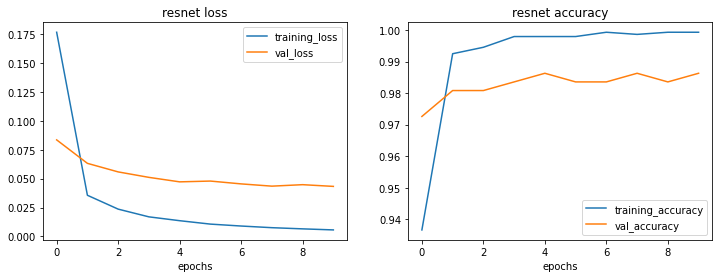

In [13]:
# Plot resnet loss curves
plot_loss_curves(resent_history, 'resnet loss', 'resnet accuracy')

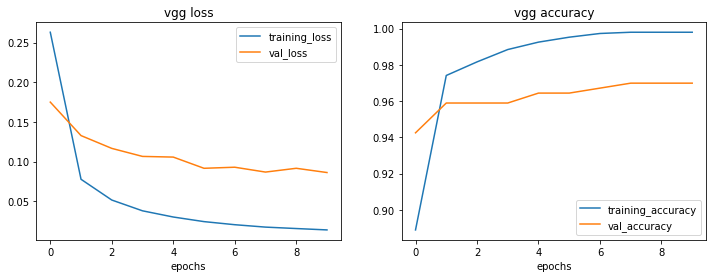

In [14]:
# Plot vgg loss curves
plot_loss_curves(vgg_history, 'vgg loss', 'vgg accuracy')

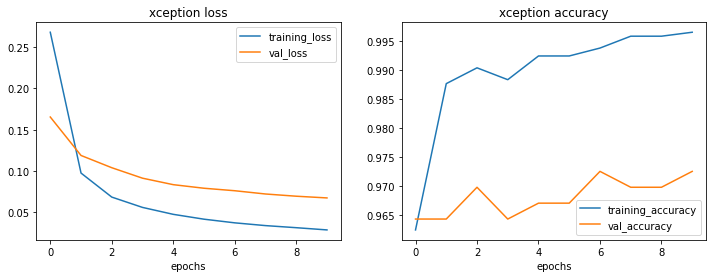

In [15]:
# Plot xception loss curves
plot_loss_curves(xception_history, 'xception loss', 'xception accuracy')

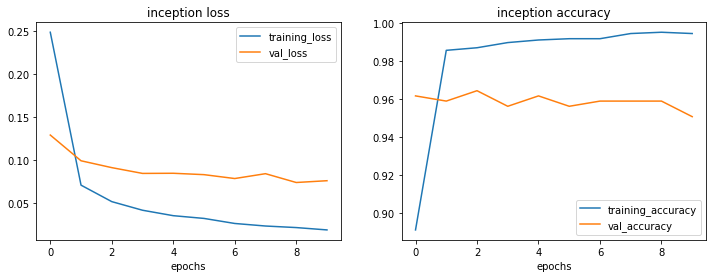

In [16]:
# Plot inception loss curves
plot_loss_curves(inception_history, 'inception loss', 'inception accuracy')

In [17]:
# Evaluate resnet50
resnet_loss, resnet_acc = resnet_model.evaluate(val_ds_resnet)

12/12 [==============================] - 2s 129ms/step - loss: 0.0433 - accuracy: 0.9863


In [18]:
# Evaluate vgg16
vgg_loss, vgg_acc = vgg_model.evaluate(val_ds_vgg)

12/12 [==============================] - 1s 105ms/step - loss: 0.0862 - accuracy: 0.9699


In [19]:
# Evaluate xception
xception_loss, xception_acc = xception_model.evaluate(val_ds_xception)

12/12 [==============================] - 1s 91ms/step - loss: 0.0674 - accuracy: 0.9726


In [20]:
# Evaluate inception
inception_loss, inception_acc = inception_model.evaluate(val_ds_inception)

12/12 [==============================] - 1s 110ms/step - loss: 0.0762 - accuracy: 0.9507


In [21]:
# Create dataframe to display loss and accuracy of models after evaluation
performance_df = pd.DataFrame({'loss': [resnet_loss, vgg_loss, xception_loss, inception_loss],
                               'accuracy': [resnet_acc, vgg_acc, xception_acc, inception_acc]},
                               index=['resnet50', 'vgg16', 'xception', 'inception_v3'])
performance_df.sort_values(by='accuracy', ascending=False)

,loss,accuracy
resnet50,0.043299,0.986301
xception,0.067409,0.972603
vgg16,0.086150,0.969863
inception_v3,0.076205,0.950685


Given that there is little variance in accuracy among the models, we will proceed with further experimentation using `Xception`, as it has a smaller size in comparison to the other models.

For more details: https://keras.io/api/applications/